# LAB: Images

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False);

replicating local resources


In [2]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
    %load_ext tensorboard
import tensorflow as tf
tf.__version__

setting tensorflow version in colab
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.17.0'

In [3]:
import tensorflow as tf
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from local.lib import mlutils
%matplotlib inline

## **Imágenes como datos: visualizaciones**

Para mostrar datos de imágenes, dependerá de la biblioteca Matplotlib de Python y, específicamente, utilizará el submódulo pyplot de matplotlib, que contiene muchos comandos de trazado. Algunos de estos comandos le permiten mostrar el contenido de las imágenes almacenadas en matrices.

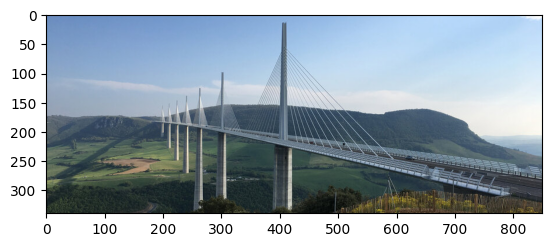

In [5]:
# Load the image
datos = plt.imread('local/imgs/puentes.jpg')

# Display the image
plt.imshow(datos)
plt.show()

## **Imágenes como datos: cambiar imágenes**

Para modificar una imagen, puede modificar los números existentes en la matriz. En una imagen en color, puede cambiar los valores en uno de los canales de color sin afectar los demás colores, indexando en la última dimensión de la matriz.

Modifique la imagen del puente para reemplazar la esquina superior izquierda de la imagen (30 por 30 píxeles) en un cuadrado rojo.
Visualice la imagen resultante.

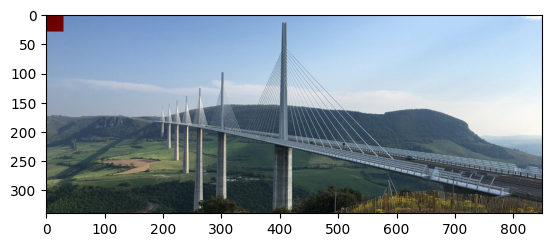

In [23]:
data = datos.copy()

# Set the green channel in this part of the image to 0
data[:30, :30, 1] = 0

# Set the blue channel in this part of the image to 0
data[:30, :30, 2] = 0


# Visualize the result
plt.imshow(data)
plt.show()

## **Convoluciones**

### **Convoluciones unidimensionales**

Una convolución de una matriz unidimensional con un núcleo consiste en tomar el núcleo, deslizarlo a lo largo de la matriz, multiplicarlo con los elementos de la matriz que se superponen con el núcleo en esa ubicación y sumar este producto.

Multiplique cada ventana en la matriz de entrada con el kernel, sume el resultado multiplicado y asigne el resultado en la entrada correcta en la matriz de salida (conv).

In [21]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] =  (kernel * array[ii:ii+len(kernel)]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


### **Convoluciones de imagen**

La convolución de una imagen con núcleo resume una parte de la imagen como la suma de la multiplicación de esa parte de la imagen con núcleo. En este ejercicio, escribirás el código que ejecuta una convolución de una imagen con un kernel usando Numpy. Dada una imagen en blanco y negro almacenada en la variable im, escriba las operaciones dentro del bucle que ejecutaría la convolución con el núcleo proporcionado.

In [22]:
im = plt.imread('local/imgs/puestes_verdes.jpg')

kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

[[[1269. 1269. 1269.]
  [1269. 1269. 1269.]
  [1269. 1269. 1269.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[1269. 1269. 1269.]
  [1269. 1269. 1269.]
  [1269. 1269. 1269.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[1269. 1269. 1269.]
  [1269. 1269. 1269.]
  [1269. 1269. 1269.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 ...

 [[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]]


Considera los siguientes kernels

Determina líneas Verticales en la imágen


np.array([[-1, 1, -1],
          [-1, 1, -1],
          [-1, 1, -1]])

Determina líneas horizontales en la imágen

kernel = np.array([[-1, -1, -1],
                   [1, 1, 1],
                   [-1, -1 ,-1]])

Define un núcleo que encuentra un punto claro rodeado de píxeles oscuros.

kernel = np.array([[-1, -1, -1],
                   [-1, 1, -1],
                   [-1, -1, -1]])

Define un núcleo que encuentra un punto oscuro rodeado de píxeles brillantes.

kernel = np.array([[1, 1, 1],
                   [1, -1, 1],
                   [1, 1, 1]])

Aplica los kernels definidos previamente y observa los cambios directamente sobre la imágen

In [49]:
kernels = {
    "Lineas Verticales": np.array([[-1, 1, -1], [-1, 1, -1], [-1, 1, -1]]),
    "Lineas Horizontales": np.array([[-1, -1, -1], [1, 1, 1], [-1, -1, -1]]),
    "Nucleo_1": np.array([[-1, -1, -1], [-1, 1, -1], [-1, -1, -1]]),
    "Nucleo_": np.array([[1, 1, 1], [1, -1, 1], [1, 1, 1]])
}

In [50]:
# Aplicar cada kernel
for name, kernel in kernels.items():
    result = np.zeros(im.shape)
    for ii in range(im.shape[0] - 2):
        for jj in range(im.shape[1] - 2):
            result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

In [54]:
# Normalizar el resultado
result = (result - result.min()) / (result.max() - result.min())

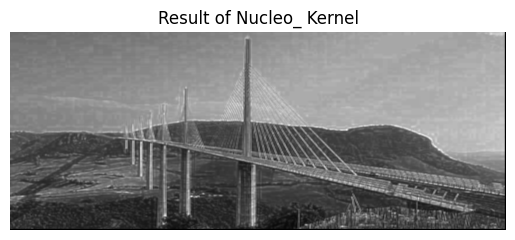

In [57]:
# Mostrar el resultado
plt.figure()
plt.title(f"Result of {name} Kernel")
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()